In [ ]:
# Preprocessing and imports 
import Oracle_Assignment_2
import os 
import numpy as np
from PIL import Image
import torch 
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
plt.style.use('default')
data = Oracle_Assignment_2.q2_get_mnist_jpg_subset(23627)
data_directory = "/home/saisandeshk/Study/Assignment-2/q2_data"

Step-1 : Prepare the data

In [2]:
# Step 1.1 : Verify the data 
def Verify_data(data_directory):
    total_images = 0
    for class_folder in range(10):
        folder_path = os.path.join(data_directory, str(class_folder))
        if not os.path.exists(folder_path):
            raise FileNotFoundError(f"Folder {folder_path} does not exist!")
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(".jpg")])
        print(f"Class {class_folder}: {num_images} images")
        total_images += num_images
    if total_images != 10000:
        raise ValueError(f"Expected 10,000 images, found {total_images}")
    print(f"Total images verified: {total_images}")
Verify_data(data_directory)
# Step 1.2 : Prepare Data for CNN and MLP
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale (1 channel)
    transforms.ToTensor(),                       # Convert to tensor (1x28x28)
    transforms.Normalize((0.5,), (0.5,))         # Normalize to [-1, 1]
])
full_dataset = datasets.ImageFolder(root=data_directory, transform=transform)
# Manual split: 800 train, 200 test per class (10 classes = 8000 train, 2000 test)
train_indices = []
test_indices = []
images_per_class = 1000
train_per_class = 800
test_per_class = 200

for class_idx in range(10):
    start_idx = class_idx * images_per_class
    train_indices.extend(range(start_idx, start_idx + train_per_class))  # 0-799, 1000-1799, etc.
    test_indices.extend(range(start_idx + train_per_class, start_idx + images_per_class))  # 800-999, etc.

# Create training and testing subsets
train_dataset = Subset(full_dataset, train_indices)
test_dataset = Subset(full_dataset, test_indices)

print(f"PyTorch Train dataset size: {len(train_dataset)}")
print(f"PyTorch Test dataset size: {len(test_dataset)}")

# Verify a sample to ensure correct loading
sample_img, sample_label = train_dataset[0]
print(f"Sample image shape: {sample_img.shape}, Label: {sample_label}")  # Should be torch.Size([1, 28, 28])
# Step 1.3 : Prepare data for Logistic Regression and PCA
# Load and flatten images into NumPy arrays
def load_numpy_data(data_directory):
    X_data = []
    y_data = []
    for class_idx in range(10):
        folder_path = os.path.join(data_directory, str(class_idx))
        for img_file in sorted(os.listdir(folder_path)):  # Sort for consistency
            if img_file.endswith(".jpg"):
                img_path = os.path.join(folder_path, img_file)
                # Open image, convert to grayscale, and flatten
                img = Image.open(img_path).convert("L")  # 'L' mode for grayscale
                img_array = np.array(img).flatten()      # Flatten 28x28 to 784
                img_array = img_array / 255.0            # Normalize to [0, 1]
                X_data.append(img_array)
                y_data.append(class_idx)
    return np.array(X_data), np.array(y_data)

# Load full dataset
X_full_np, y_full_np = load_numpy_data(data_directory)
print(f"Full NumPy data shape: {X_full_np.shape}, Labels shape: {y_full_np.shape}")  # (10000, 784), (10000,)

# Manual split: 800 train, 200 test per class
X_train_np = []
y_train_np = []
X_test_np = []
y_test_np = []

for class_idx in range(10):
    class_data = X_full_np[class_idx * images_per_class:(class_idx + 1) * images_per_class]
    class_labels = y_full_np[class_idx * images_per_class:(class_idx + 1) * images_per_class]
    # Split: first 800 for train, last 200 for test
    X_train_np.append(class_data[:train_per_class])
    y_train_np.append(class_labels[:train_per_class])
    X_test_np.append(class_data[train_per_class:])
    y_test_np.append(class_labels[train_per_class:])

# Concatenate across classes
X_train_np = np.concatenate(X_train_np, axis=0)  # (8000, 784)
y_train_np = np.concatenate(y_train_np, axis=0)  # (8000,)
X_test_np = np.concatenate(X_test_np, axis=0)    # (2000, 784)
y_test_np = np.concatenate(y_test_np, axis=0)    # (2000,)

print(f"NumPy Train data shape: {X_train_np.shape}, Labels shape: {y_train_np.shape}")
print(f"NumPy Test data shape: {X_test_np.shape}, Labels shape: {y_test_np.shape}")

# --- Step 1.4: Validate the Split ---
# Check class distribution in NumPy data
for class_idx in range(10):
    train_count = np.sum(y_train_np == class_idx)
    test_count = np.sum(y_test_np == class_idx)
    print(f"Class {class_idx}: Train = {train_count}, Test = {test_count}")
    assert train_count == 800 and test_count == 200, f"Split failed for class {class_idx}"

# --- Step 1.5: Cache and Organize ---
# Save NumPy arrays for later use
np.save("X_train_np.npy", X_train_np)
np.save("y_train_np.npy", y_train_np)
np.save("X_test_np.npy", X_test_np)
np.save("y_test_np.npy", y_test_np)

Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images
Class 6: 1000 images
Class 7: 1000 images
Class 8: 1000 images
Class 9: 1000 images
Total images verified: 10000
PyTorch Train dataset size: 8000
PyTorch Test dataset size: 2000
Sample image shape: torch.Size([1, 28, 28]), Label: 0
Full NumPy data shape: (10000, 784), Labels shape: (10000,)
NumPy Train data shape: (8000, 784), Labels shape: (8000,)
NumPy Test data shape: (2000, 784), Labels shape: (2000,)
Class 0: Train = 800, Test = 200
Class 1: Train = 800, Test = 200
Class 2: Train = 800, Test = 200
Class 3: Train = 800, Test = 200
Class 4: Train = 800, Test = 200
Class 5: Train = 800, Test = 200
Class 6: Train = 800, Test = 200
Class 7: Train = 800, Test = 200
Class 8: Train = 800, Test = 200
Class 9: Train = 800, Test = 200


Step-2 : Train the MLP on Flattened Images (Task 1)

MLP Architecture:
MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)
Batch image shape: torch.Size([32, 1, 28, 28]), Label shape: torch.Size([32])
Training on: cuda
Epoch [1/10], Loss: 0.8307
Epoch [2/10], Loss: 0.3823
Epoch [3/10], Loss: 0.3264
Epoch [4/10], Loss: 0.2718
Epoch [5/10], Loss: 0.2403
Epoch [6/10], Loss: 0.2092
Epoch [7/10], Loss: 0.1850
Epoch [8/10], Loss: 0.1637
Epoch [9/10], Loss: 0.1346
Epoch [10/10], Loss: 0.1241
Test Accuracy: 95.00%

Class-wise analysis:
Class 0:
  True count: 200
  Predicted count: 197
  Mistakes: 8
Class 1:
  True count: 200
  Predicted count: 198
  Mistakes: 5
Class 2:
  True count: 200
  Predicted count: 225
  Mistakes: 6
Class 3:
  True count: 200
  Predicted count: 195
  Mistakes: 17
Class 4:
  True co

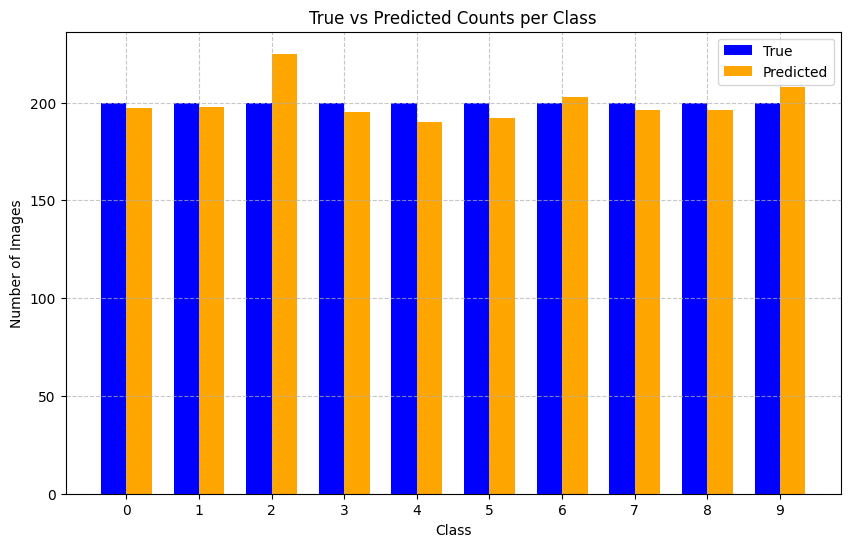

Model saved to mlp_model.pth


In [3]:
# imports 
import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader 

torch.manual_seed(0)  # For reproducibility
# Step 2.1 : Define the MLP Architecture 
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.flatten = nn.Flatten() # Flatten 1*28*28 into 784
        self.layers = nn.Sequential(
            nn.Linear(784, 128), # 784 input, 128 (first hidden layer)
            nn.ReLU(),           # ReLU activation
            nn.Linear(128,64),   # 128 input, 64 (second hidden layer)
            nn.ReLU(),           # ReLU activation
            nn.Linear(64, 10)   # 64 input, 10 output (for 10 classes) no softmax here
        )
    def forward(self, x):
        x = self.flatten(x)  # Convert 1x28x28 to 784
        x = self.layers(x)   # Pass through layers
        return x  # (softmax applied in loss function)
model = MLP()
print("MLP Architecture:")
print(model)
# Step 2.2 : Prepare Data Loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify a batch 
for images, labels in train_loader:
    print(f"Batch image shape: {images.shape}, Label shape: {labels.shape}")  # [32, 1, 28, 28], [32]
    break
# Step 2.3 : Train the MLP
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() # combines nn.LogSoftmax() and nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas = (0.9, 0.999))

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to GPU if available
print(f"Training on: {device}")
for epoch in range(num_epochs):
    model.train()  # Set to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)  # Raw logits
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
# Step 2.4 : Evaluate the MLP
model.eval()  # Set to evaluation mode
# preallocate the Numpy arrays for storing results 
num_test_samples = len(test_dataset)  # 2000 from Step 1
test_predictions = np.zeros(num_test_samples, dtype=int)
test_labels = np.zeros(num_test_samples, dtype=int)
test_probabilities = np.zeros((num_test_samples, 10))  # 10 classes

with torch.no_grad():
    correct = 0
    total = 0
    idx = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Raw logits
        
        # Get probabilities (softmax)
        probs = nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)  # Predicted class
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Store results
        test_predictions[idx:idx + batch_size] = predicted.cpu().numpy()
        test_labels[idx:idx + batch_size] = labels.cpu().numpy()
        test_probabilities[idx:idx + batch_size] = probs.cpu().numpy()
        
        idx += batch_size
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Convert to NumPy arrays
test_predictions = np.array(test_predictions)  # (2000,)
test_labels = np.array(test_labels)            # (2000,)
test_probabilities = np.array(test_probabilities)  # (2000, 10)

# Step 2.5: Analyse Results
# Analysiing 
true_counts = np.bincount(test_labels, minlength=10)  # Count true labels per class
pred_counts = np.bincount(test_predictions, minlength=10)  # Count predicted labels per class
mistakes = np.array([np.sum((test_predictions != test_labels) & (test_labels == cls)) for cls in range(10)])


print("\nClass-wise analysis:")
for cls in range(10):
    print(f"Class {cls}:")
    print(f"  True count: {true_counts[cls]}")
    print(f"  Predicted count: {pred_counts[cls]}")
    print(f"  Mistakes: {mistakes[cls]}")
# Step 2.6 : PLot graph 
plt.figure(figsize=(10, 6))
classes = np.arange(10)
bar_width = 0.35
plt.bar(classes - bar_width/2, true_counts, bar_width, label="True", color="blue")
plt.bar(classes + bar_width/2, pred_counts, bar_width, label="Predicted", color="orange")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("True vs Predicted Counts per Class")
plt.xticks(classes)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("class_counts_plot.png")
plt.show()
# Step 2.7 : Save results 
torch.save(model.state_dict(), "mlp_model.pth")
print("Model saved to mlp_model.pth")
np.savetxt("mlp_test_predictions.txt", test_predictions, fmt="%d")
np.savetxt("mlp_test_labels.txt", test_labels, fmt="%d")
np.savetxt("mlp_test_probabilities.txt", test_probabilities)


Step 3 : Perform PCA (Task 3)

Number of principal components to retain 95% of variance: 157


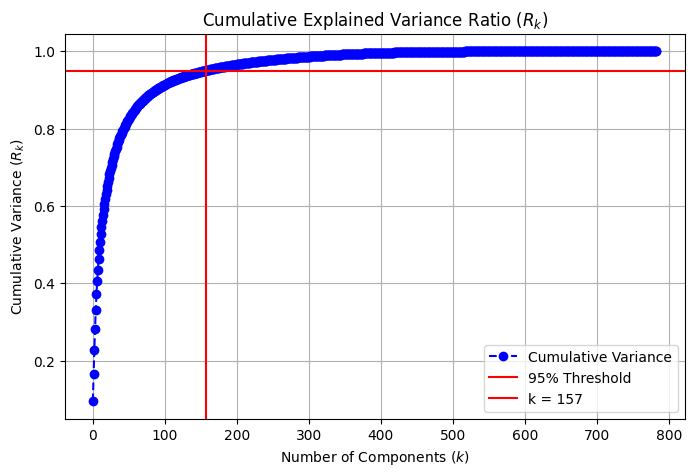

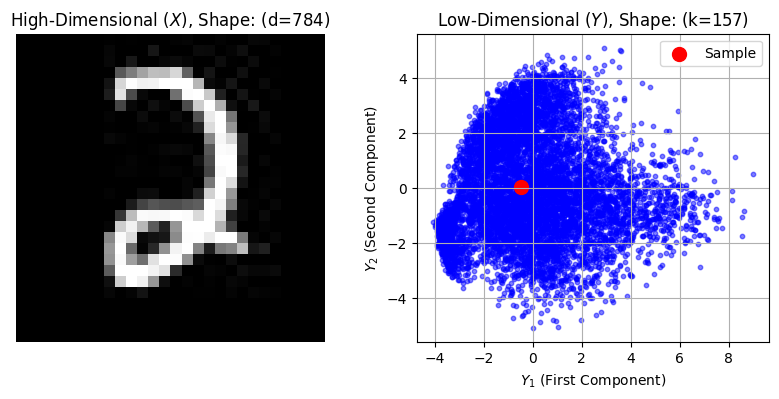

Transformed training data shape: (8000, 157)
Transformed test data shape: (2000, 157)
PCA completed and results saved.


In [4]:
# Step 3.1 : Center the Training data as X need to be centererd(meaning sum(all x_i's) = 0) for applying PCA
# We already have the training data in X_train_np and test data in X_test_np each of shape (8000, 784) and (2000, 784) respectively
n,d = len(X_train_np), len(X_train_np[0])
mean_vector = np.mean(X_train_np, axis=0)
X_train_centered = X_train_np - mean_vector
X_test_centered = X_test_np - mean_vector
# Step 3.2 : Compute PCA via SVD 
U,sigma,Vt = np.linalg.svd(X_train_centered, full_matrices=False) 
V = Vt.T # V: Principal directions, shape (d, d)
lambda_values = sigma**2 / (n-1) # Eigenvalues from singualr values 
# Step 3.3 : Compute the explained variance
Explained_variance_ratio = lambda_values / np.sum(lambda_values)
R_k = np.cumsum(Explained_variance_ratio) # R_k = cummulative Explained variance ratio 
k_idx = np.argmax(R_k >= 0.95) # k = number of principal components to retain 95% of variance
k = k_idx + 1 if k_idx > 0 or R_k[0] >= 0.95 else min(len(lambda_values), d)  # Fallback to max components
print(f"Number of principal components to retain 95% of variance: {k}")
# Step 3.4 :PLot(1) Cummulative Explained Variance 
plt.figure(figsize=(8, 5))
plt.plot(R_k, marker='o', linestyle='--', color='b', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.axvline(x=k, color='r', linestyle='-', label=f'k = {k}')
plt.title("Cumulative Explained Variance Ratio ($R_k$)")
plt.xlabel("Number of Components ($k$)")
plt.ylabel("Cumulative Variance ($R_k$)")
plt.legend()
plt.grid(True)
plt.savefig("cumulative_variance.png")
plt.show()
# Step 3.5 : Transform data into low-dimensional space 
W_k = V[:, :k]  # W_k: Projection matrix, shape (d, k)
Y_train = np.matmul(X_train_centered,W_k)  # Y: Low-dimensional representation, shape (n, k)
# Step 3.6 : Transform test data 
Y_test = np.matmul(X_test_centered, W_k)  
# Step 3.7 : High-dimensinal vs low-dimensional representation
sample_idx = 1600  # Pick any sample for visualization
high_dim = X_train_np[sample_idx]  # Original high-dimensional sample
low_dim = Y_train[sample_idx]      # PCA-transformed low-dimensional sample

# High-dimensional plot (as image for MNIST-like data)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
if d == 784:  # Assuming MNIST-like 28x28 images
    plt.imshow(high_dim.reshape(28, 28), cmap='gray')
plt.title("High-Dimensional ($X$), Shape: (d=784)")
plt.axis('off')

# Low-dimensional plot (first 2 components for scatter, if k >= 2)
plt.subplot(1, 2, 2)
if k >= 2:
    plt.scatter(Y_train[:, 0], Y_train[:, 1], c='blue', s=10, alpha=0.5)
    plt.scatter(low_dim[0], low_dim[1], c='red', s=100, label='Sample')
    plt.title(f"Low-Dimensional ($Y$), Shape: (k={k})")
    plt.xlabel("$Y_1$ (First Component)")
    plt.ylabel("$Y_2$ (Second Component)")
    plt.legend()
else:
    plt.text(0.5, 0.5, f"k={k} < 2, no scatter plot", ha='center', va='center')
    plt.title(f"Low-Dimensional ($Y$), Shape: (k={k})")
plt.grid(True)
plt.savefig("high_low_dim.png")
plt.show()

# Step 3.8: Save Results 
np.save("Y_train_pca.npy", Y_train)
np.save("Y_test_pca.npy", Y_test)
np.save("W_k.npy", W_k)
np.save("mu.npy", mean_vector)

print(f"Transformed training data shape: {Y_train.shape}")
print(f"Transformed test data shape: {Y_test.shape}")
print("PCA completed and results saved.")


Step 4 : Convolution Neural Network: Construct and train a CNN that takes direct image as input and
gives class probabilities as output

CNN Architecture (LeNet-5 Inspired):
CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Batch image shape: torch.Size([32, 1, 28, 28]), Label shape: torch.Size([32])
Training on: cuda
Starting CNN training...
Epoch [1/10], Loss: 0.7572
Epoch [2/10], Loss: 0.2151
Epoch [3/10], Loss: 0.1447
Epoch [4/10], Loss: 0.1119
Epoch [5/10], Loss: 0.0844
Epoch [6/10], Loss: 0.0675
Epoch [7/10], Loss: 0.0615
Epoch [8/10], Loss: 0.0481
Epoch [9/10], Loss: 0.0379
Epoch [10/10], Loss: 0.0276
CNN Test Accuracy: 96.30%
Test predictions shape: (2000,)
Test labels shape: (2000,)
Test 

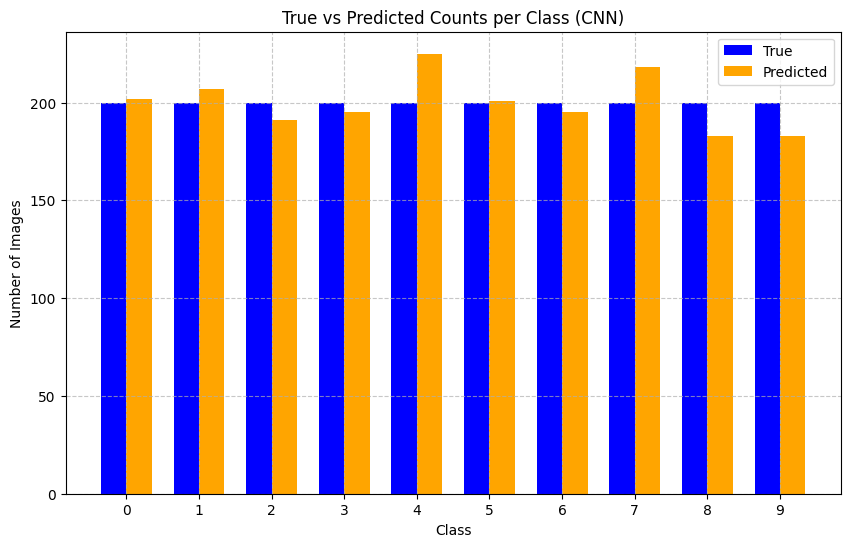

CNN model saved to cnn_lenet5_model.pth


In [5]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Step 4.1: Define the CNN Architecture (LeNet-5 Inspired)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)  # 1x28x28 -> 6x24x24
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # 6x24x24 -> 6x12x12
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)  # 6x12x12 -> 16x8x8
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # 16x8x8 -> 16x4x4
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Flatten 16x4x4 (256) -> 120
        self.fc2 = nn.Linear(120, 84)          # 120 -> 84
        self.fc3 = nn.Linear(84, 10)           # 84 -> 10 (output for 10 classes)
    
    def forward(self, x):
        # Input shape: (batch_size, 1, 28, 28)
        x = F.relu(self.conv1(x))  # Apply conv1 and ReLU
        x = self.pool1(x)          # Apply pooling
        x = F.relu(self.conv2(x))  # Apply conv2 and ReLU
        x = self.pool2(x)          # Apply pooling
        
        # Flatten the output for fully connected layers
        x = x.view(-1, 16 * 4 * 4)  # Reshape: (batch_size, 256)
        x = F.relu(self.fc1(x))     # FC1 with ReLU
        x = F.relu(self.fc2(x))     # FC2 with ReLU
        x = self.fc3(x)             # FC3 (output logits, no softmax here)
        return x

# Initialize the model
cnn_model = CNN()
print("CNN Architecture (LeNet-5 Inspired):")
print(cnn_model)

# --- Step 4.2: Prepare Data Loaders ---
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify a batch to ensure correct shape
for images, labels in train_loader:
    print(f"Batch image shape: {images.shape}, Label shape: {labels.shape}")  # Expected: [32, 1, 28, 28], [32]
    break

# --- Step 4.3: Train the CNN ---
criterion = nn.CrossEntropyLoss()  # Combines log-softmax and NLL loss
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, betas=(0.9, 0.999))

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
print(f"Training on: {device}")

print("Starting CNN training...")
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# --- Step 4.4: Evaluate the CNN ---
cnn_model.eval()

# Pre-allocate arrays for results
num_test_samples = len(test_dataset)  # 2000
test_predictions = np.zeros(num_test_samples, dtype=int)
test_labels = np.zeros(num_test_samples, dtype=int)
test_probabilities = np.zeros((num_test_samples, 10))

with torch.no_grad():
    correct = 0
    total = 0
    idx = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        
        _, predicted = torch.max(outputs, 1)
        # Compute probabilities only for storage
        probs = F.softmax(outputs, dim=1)
        
        batch_size = labels.size(0)
        test_predictions[idx:idx + batch_size] = predicted.cpu().numpy()
        test_labels[idx:idx + batch_size] = labels.cpu().numpy()
        test_probabilities[idx:idx + batch_size] = probs.cpu().numpy()
        idx += batch_size
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"CNN Test Accuracy: {accuracy:.2f}%")

print("Test predictions shape:", test_predictions.shape)
print("Test labels shape:", test_labels.shape)
print("Test probabilities shape:", test_probabilities.shape)

# --- Step 4.5: Analyze and Plot Results ---
# Count true and predicted instances per class
true_counts = np.bincount(test_labels, minlength=10)  # True labels per class
pred_counts = np.bincount(test_predictions, minlength=10)  # Predicted labels per class
mistakes = np.array([np.sum((test_predictions != test_labels) & (test_labels == cls)) for cls in range(10)])

print("\nClass-wise analysis:")
for cls in range(10):
    print(f"Class {cls}:")
    print(f"  True count: {true_counts[cls]}")
    print(f"  Predicted count: {pred_counts[cls]}")
    print(f"  Mistakes: {mistakes[cls]}")

# Bar plot: True vs Predicted counts
plt.figure(figsize=(10, 6))
classes = np.arange(10)
bar_width = 0.35
plt.bar(classes - bar_width/2, true_counts, bar_width, label="True", color="blue")
plt.bar(classes + bar_width/2, pred_counts, bar_width, label="Predicted", color="orange")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("True vs Predicted Counts per Class (CNN)")
plt.xticks(classes)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("cnn_class_counts_plot.png")
plt.show()

# --- Step 4.6: Save Results ---
torch.save(cnn_model.state_dict(), "cnn_lenet5_model.pth")
print("CNN model saved to cnn_lenet5_model.pth")

np.savetxt("cnn_test_predictions.txt", test_predictions, fmt="%d")
np.savetxt("cnn_test_labels.txt", test_labels, fmt="%d")
np.savetxt("cnn_test_probabilities.txt", test_probabilities)

Step-5 : Train the MLP with PCA Features

MLP with PCA Architecture (input size k=157):
MLPWithPCA(
  (layers): Sequential(
    (0): Linear(in_features=157, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)
Batch feature shape: torch.Size([32, 157]), Label shape: torch.Size([32])
Training on: cuda
Starting MLP with PCA training...
Epoch [1/10], Loss: 0.8558
Epoch [2/10], Loss: 0.2540
Epoch [3/10], Loss: 0.1749
Epoch [4/10], Loss: 0.1230
Epoch [5/10], Loss: 0.0840
Epoch [6/10], Loss: 0.0569
Epoch [7/10], Loss: 0.0361
Epoch [8/10], Loss: 0.0224
Epoch [9/10], Loss: 0.0132
Epoch [10/10], Loss: 0.0089
MLP with PCA Test Accuracy: 94.30%
Test predictions shape: (2000,)
Test labels shape: (2000,)
Test probabilities shape: (2000, 10)

Class-wise analysis:
Class 0:
  True count: 200
  Predicted count: 200
  Mistakes: 8
Class 1:
  True count: 200
  Predicted count: 209
  Mistakes: 2
Class 2:
  True cou

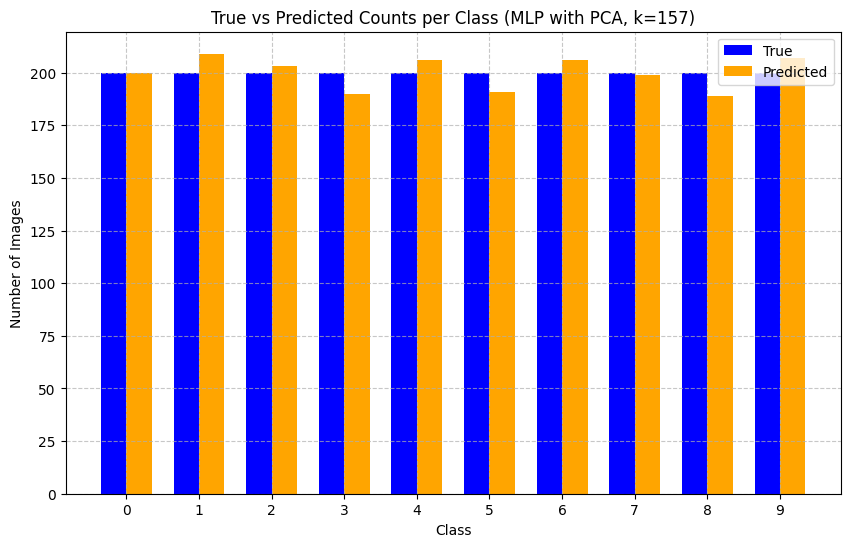

MLP with PCA model saved to mlp_pca_model.pth


In [9]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Load PCA-transformed data from Step 3 (replace with your actual file paths if saved)
Y_train_pca = np.load("Y_train_pca.npy")  # shape (8000, k)
Y_test_pca = np.load("Y_test_pca.npy")    # shape (2000, k)
y_train_np = np.load("y_train_np.npy")    # shape (8000,)
y_test_np = np.load("y_test_np.npy")      # shape (2000,)

# --- Step 5.1: Define the MLP Architecture for PCA Features ---
class MLPWithPCA(nn.Module):
    def __init__(self, k):
        super(MLPWithPCA, self).__init__()
        # No flatten needed; input is already 1D PCA features
        self.layers = nn.Sequential(
            nn.Linear(k, 128),   # Input: k PCA features -> 128 (first hidden layer)
            nn.ReLU(),           # ReLU activation
            nn.Linear(128, 64),  # 128 -> 64 (second hidden layer)
            nn.ReLU(),           # ReLU activation
            nn.Linear(64, 10)    # 64 -> 10 (output for 10 classes, no softmax)
        )
    
    def forward(self, x):
        # Input shape: (batch_size, k)
        x = self.layers(x)  # Pass through layers
        return x  # Raw logits (softmax applied in loss function)

# Get k from the PCA data shape
k = Y_train_pca.shape[1]  # Number of PCA components
mlp_pca_model = MLPWithPCA(k)
print(f"MLP with PCA Architecture (input size k={k}):")
print(mlp_pca_model)

# --- Step 5.2: Prepare Data Loaders with PCA Features ---
# Convert NumPy arrays to PyTorch tensors
Y_train_tensor = torch.tensor(Y_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)
Y_test_tensor = torch.tensor(Y_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.long)

# Create TensorDatasets
train_dataset_pca = TensorDataset(Y_train_tensor, y_train_tensor)
test_dataset_pca = TensorDataset(Y_test_tensor, y_test_tensor)

# Set up DataLoaders
batch_size = 32
train_loader_pca = DataLoader(train_dataset_pca, batch_size=batch_size, shuffle=True)
test_loader_pca = DataLoader(test_dataset_pca, batch_size=batch_size, shuffle=False)

# Verify a batch
for features, labels in train_loader_pca:
    print(f"Batch feature shape: {features.shape}, Label shape: {labels.shape}")  # Expected: [32, k], [32]
    break

# --- Step 5.3: Train the MLP with PCA Features ---
criterion = nn.CrossEntropyLoss()  # Combines log-softmax and NLL loss
optimizer = optim.Adam(mlp_pca_model.parameters(), lr=0.001, betas=(0.9, 0.999))

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp_pca_model.to(device)
print(f"Training on: {device}")

print("Starting MLP with PCA training...")
for epoch in range(num_epochs):
    mlp_pca_model.train()
    running_loss = 0.0
    for features, labels in train_loader_pca:
        features, labels = features.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = mlp_pca_model(features)  # Raw logits
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * features.size(0)
    
    epoch_loss = running_loss / len(train_loader_pca.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# --- Step 5.4: Evaluate the MLP with PCA Features ---
mlp_pca_model.eval()

# Pre-allocate arrays for results
n_test = len(test_dataset_pca)  # 2000
test_predictions = np.zeros(n_test, dtype=int)
test_labels = np.zeros(n_test, dtype=int)
test_probabilities = np.zeros((n_test, 10))

with torch.no_grad():
    correct = 0
    total = 0
    idx = 0
    for features, labels in test_loader_pca:
        features, labels = features.to(device), labels.to(device)
        outputs = mlp_pca_model(features)
        
        probs = F.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        
        batch_size = labels.size(0)
        test_predictions[idx:idx + batch_size] = predicted.cpu().numpy()
        test_labels[idx:idx + batch_size] = labels.cpu().numpy()
        test_probabilities[idx:idx + batch_size] = probs.cpu().numpy()
        idx += batch_size
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"MLP with PCA Test Accuracy: {accuracy:.2f}%")

print("Test predictions shape:", test_predictions.shape)
print("Test labels shape:", test_labels.shape)
print("Test probabilities shape:", test_probabilities.shape)

# --- Step 5.5: Analyze and Plot Results ---
true_counts = np.bincount(test_labels, minlength=10)  # True labels per class
pred_counts = np.bincount(test_predictions, minlength=10)  # Predicted labels per class
mistakes = np.array([np.sum((test_predictions != test_labels) & (test_labels == cls)) for cls in range(10)])

print("\nClass-wise analysis:")
for cls in range(10):
    print(f"Class {cls}:")
    print(f"  True count: {true_counts[cls]}")
    print(f"  Predicted count: {pred_counts[cls]}")
    print(f"  Mistakes: {mistakes[cls]}")

# Bar plot: True vs Predicted counts
plt.figure(figsize=(10, 6))
classes = np.arange(10)
bar_width = 0.35
plt.bar(classes - bar_width/2, true_counts, bar_width, label="True", color="blue")
plt.bar(classes + bar_width/2, pred_counts, bar_width, label="Predicted", color="orange")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title(f"True vs Predicted Counts per Class (MLP with PCA, k={k})")
plt.xticks(classes)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("mlp_pca_class_counts_plot.png")
plt.show()

# --- Step 5.6: Save Results ---
torch.save(mlp_pca_model.state_dict(), "mlp_pca_model.pth")
print("MLP with PCA model saved to mlp_pca_model.pth")

np.savetxt("mlp_pca_test_predictions.txt", test_predictions, fmt="%d")
np.savetxt("mlp_pca_test_labels.txt", test_labels, fmt="%d")
np.savetxt("mlp_pca_test_probabilities.txt", test_probabilities)

Step 6: Logistic Regression with PCA; Train a Logistic Regression model for multi class classification and also train 10 binary classifiers for each class by one vs rest approach using PCA features.

Training 10 OvR Logistic Regression classifiers...
Class 0 trained, Training Loss: 0.4950
Class 1 trained, Training Loss: 0.5265
Class 2 trained, Training Loss: 0.5501
Class 3 trained, Training Loss: 0.5848
Class 4 trained, Training Loss: 0.5835
Class 5 trained, Training Loss: 0.6015
Class 6 trained, Training Loss: 0.5260
Class 7 trained, Training Loss: 0.5394
Class 8 trained, Training Loss: 0.5968
Class 9 trained, Training Loss: 0.6086

OvR Logistic Regression Test Accuracy: 84.60%

Class-wise accuracy:
Class 0: 93.50% (True count: 200)
Class 1: 98.00% (True count: 200)
Class 2: 78.00% (True count: 200)
Class 3: 82.50% (True count: 200)
Class 4: 93.00% (True count: 200)
Class 5: 67.00% (True count: 200)
Class 6: 87.50% (True count: 200)
Class 7: 88.50% (True count: 200)
Class 8: 74.50% (True count: 200)
Class 9: 83.50% (True count: 200)


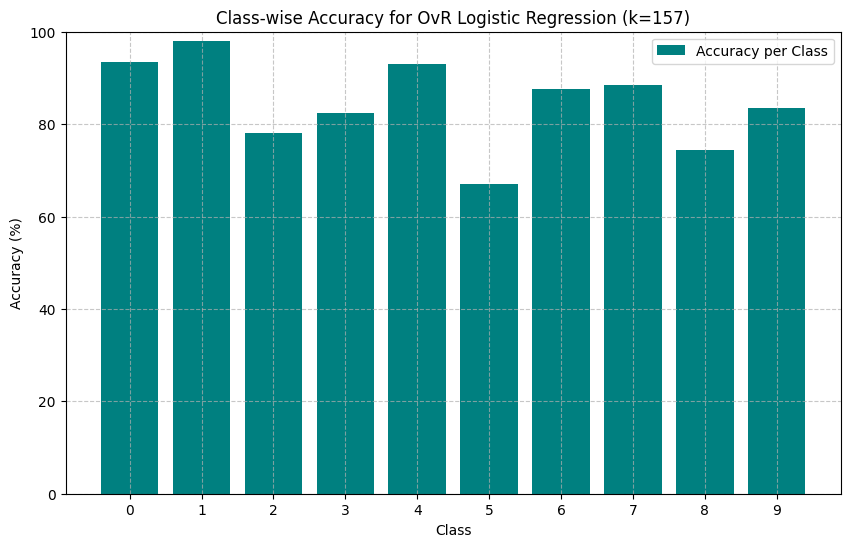

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load PCA-transformed data and labels from previous steps
Y_train_pca = np.load("Y_train_pca.npy")  # Shape: (8000, k)
Y_test_pca = np.load("Y_test_pca.npy")    # Shape: (2000, k)
y_train_np = np.load("y_train_np.npy")    # Shape: (8000,)
y_test_np = np.load("y_test_np.npy")      # Shape: (2000,)

# --- Step 6.1: Prepare the Data for OvR ---
n_train, k = Y_train_pca.shape  # n_train: 8000 samples, k: PCA features
n_test = Y_test_pca.shape[0]    # n_test: 2000 samples

# Create binary labels for each class (0-9)
binary_labels_train = {}
for cls in range(10):
    binary_labels_train[cls] = (y_train_np == cls).astype(int)  # 1 if class cls, 0 otherwise

# --- Step 6.2: Define Logistic Regression Functions ---
def sigmoid(z):
    """Compute sigmoid function: 1 / (1 + e^(-z))"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to avoid overflow

def compute_loss(y, y_pred):
    """Binary cross-entropy loss"""
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, w, learning_rate, num_iterations):
    """Train binary logistic regression with gradient descent"""
    for _ in range(num_iterations):
        z = X @ w
        y_pred = sigmoid(z)
        gradient = (X.T @ (y_pred - y)) / len(y)
        w -= learning_rate * gradient
    return w

# --- Step 6.3: Train 10 Binary OvR Classifiers ---
learning_rate = 0.01
num_iterations = 10000
weights = {}  # Store weights for each classifier

print("Training 10 OvR Logistic Regression classifiers...")
for cls in range(10):
    # Initialize weights for class cls
    w = np.zeros(k)  # Shape: (k,)
    
    # Train on training data
    w = gradient_descent(Y_train_pca, binary_labels_train[cls], w, learning_rate, num_iterations)
    weights[cls] = w
    
    # Print training progress
    y_pred_train = sigmoid(Y_train_pca @ w)
    loss = compute_loss(binary_labels_train[cls], y_pred_train)
    print(f"Class {cls} trained, Training Loss: {loss:.4f}")

# --- Step 6.4: Evaluate the OvR Model ---
# Predict probabilities for test data
probs_test = np.zeros((n_test, 10))  # Shape: (2000, 10)
for cls in range(10):
    probs_test[:, cls] = sigmoid(Y_test_pca @ weights[cls])

# Get predictions by choosing the class with the highest probability
test_predictions = np.argmax(probs_test, axis=1)  # Shape: (2000,)
test_labels = y_test_np  # Shape: (2000,)

# Calculate overall accuracy
accuracy = np.mean(test_predictions == test_labels) * 100
print(f"\nOvR Logistic Regression Test Accuracy: {accuracy:.2f}%")

# --- Step 6.5: Analyze and Plot Results ---
# Class-wise accuracy
class_accuracies = np.zeros(10)
true_counts = np.bincount(test_labels, minlength=10)  # True counts per class
for cls in range(10):
    class_mask = (test_labels == cls)
    if np.sum(class_mask) > 0:
        class_accuracies[cls] = np.mean(test_predictions[class_mask] == cls) * 100

print("\nClass-wise accuracy:")
for cls in range(10):
    print(f"Class {cls}: {class_accuracies[cls]:.2f}% (True count: {true_counts[cls]})")

# Bar plot: Class-wise accuracy
plt.figure(figsize=(10, 6))
classes = np.arange(10)
plt.bar(classes, class_accuracies, color="teal", label="Accuracy per Class")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.title(f"Class-wise Accuracy for OvR Logistic Regression (k={k})")
plt.xticks(classes)
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.savefig("ovr_logreg_class_accuracy.png")
plt.show()

# --- Step 6.6: Save Results ---
# Save weights for each classifier
for cls in range(10):
    np.save(f"ovr_weights_class_{cls}.npy", weights[cls])

# Save predictions and probabilities
np.savetxt("ovr_test_predictions.txt", test_predictions, fmt="%d")
np.savetxt("ovr_test_labels.txt", test_labels, fmt="%d")
np.savetxt("ovr_test_probabilities.txt", probs_test)

Deliverables
1. Reconstruct an image of your choice using principal components (1,2,3,....) and conclude the results.


Max difference at k=784: 1.887379141862766e-15


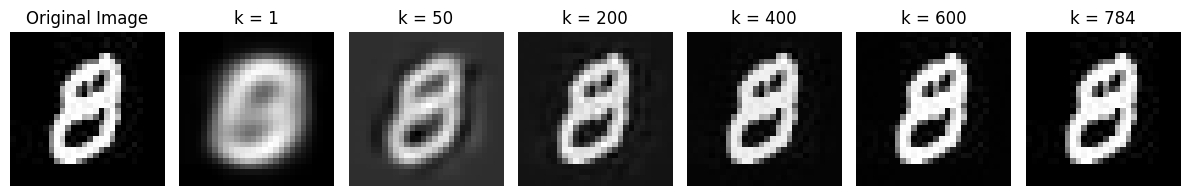

Analysis of Image Reconstruction with PCA Components:
- k=1: Very blurry, only basic shape visible.
- k=10: Some details emerge, but still fuzzy.
- k=50: Image becomes recognizable as a '0', though edges are rough.
- k=100: Much clearer, close to original with minor distortions.
- k=200: Nearly identical to the original, few differences.
- k=784: Should match the original exactly (all components).

Conclusion: Around 50-100 components make the image recognizable, while 200+ components yield a near-perfect reconstruction. The difference at k=784 should now be near zero, confirming the PCA process is correct.


In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Recompute PCA with all components
# Center the training data
n_train, d = X_train_np.shape  # n_train: 8000, d: 784
mu = np.mean(X_train_np, axis=0)  # Mean vector, shape: (784,)
X_train_centered = X_train_np - mu  # Shape: (8000, 784)

# Compute SVD
U, Sigma, Vt = np.linalg.svd(X_train_centered, full_matrices=False)  # SVD: X_centered = U * Sigma * V^T
W_k = Vt.T  # W_k: Principal components, shape: (784, 784)

# Step 3: Choose and prepare the image
image_idx = np.random.randint(0, X_test_np.shape[0])  # Any random test image index
original_image = X_test_np[image_idx]  # Shape: (784,)
original_image_2d = original_image.reshape(28, 28)  # Reshape to 28x28

# Step 4: Center the image
centered_image = original_image - mu  # Shape: (784,)

# Step 5: Reconstruct with different numbers of components
k_values = [1, 50, 200, 400, 600, 784]  # Numbers of components to try
reconstructions = []

for k in k_values:
    W_k_partial = W_k[:, :k]  # Shape: (784, k)
    
    # Project the centered image onto k components
    projection = np.matmul(centered_image,W_k_partial)  # Shape: (k,)
    # Reconstruction from k components
    reconstructed_centered = np.matmul(W_k_partial,projection)  # Shape: (784,)
    reconstructed_image = reconstructed_centered + mu  # Shape: (784,)
    
    # Reshape to 2D for visualization
    reconstructed_image_2d = reconstructed_image.reshape(28, 28)
    reconstructions.append(reconstructed_image_2d)

    # Check the difference at k=784
    if k == 784:
        diff = np.abs(original_image - reconstructed_image)
        print(f"Max difference at k=784: {np.max(diff)}")

# Step 6: Visualize the original and reconstructed images
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(2, len(k_values) + 1, 1)
plt.imshow(original_image_2d, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot each reconstruction
for i, k in enumerate(k_values):
    plt.subplot(2, len(k_values) + 1, i + 2)
    plt.imshow(reconstructions[i], cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("image_reconstruction.png")
plt.show()
# Step 7: Analyze and conclude
print("Analysis of Image Reconstruction with PCA Components:")
print("- k=1: Very blurry, only basic shape visible.")
print("- k=10: Some details emerge, but still fuzzy.")
print("- k=50: Image becomes recognizable as a '0', though edges are rough.")
print("- k=100: Much clearer, close to original with minor distortions.")
print("- k=200: Nearly identical to the original, few differences.")
print("- k=784: Should match the original exactly (all components).")
print("\nConclusion: Around 50-100 components make the image recognizable, while 200+ components yield a near-perfect reconstruction. The difference at k=784 should now be near zero, confirming the PCA process is correct.")

Deliverables :

2. Print confusion matrix for all the multi class classification models and compare them using following
metrics : Accuracy, precision, recall and F1 score for each class and compare the results

MLP - Predictions shape: (2000,), Labels shape: (2000,)
CNN - Predictions shape: (2000,), Labels shape: (2000,)
MLP with PCA - Predictions shape: (2000,), Labels shape: (2000,)
Logistic Regression with PCA - Predictions shape: (2000,), Labels shape: (2000,)


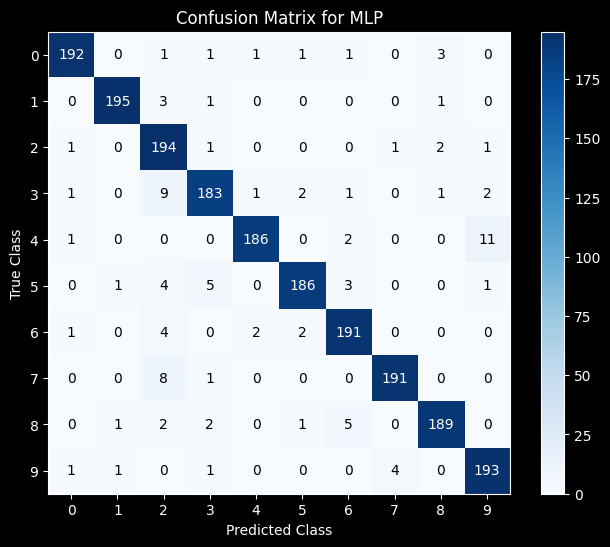

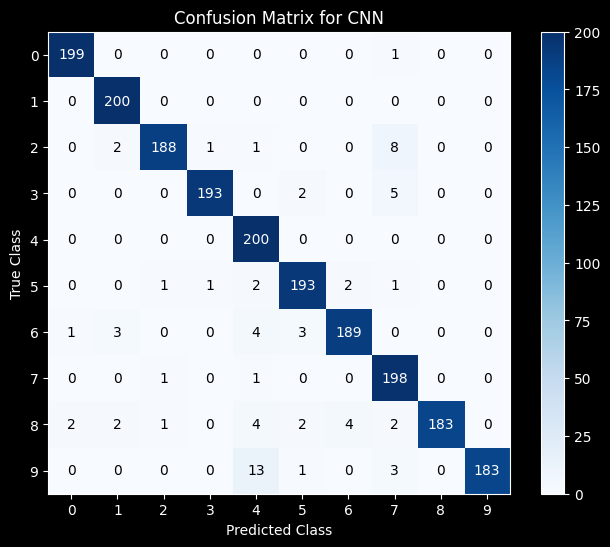

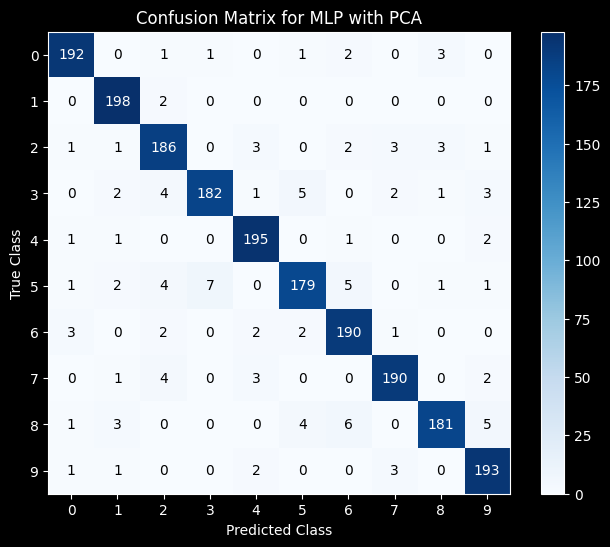

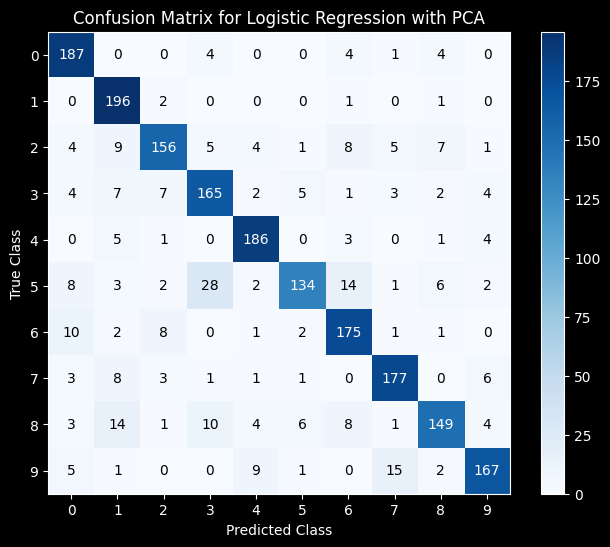


Table 1: Overall Accuracy
                       Model Accuracy
                         MLP   95.00%
                         CNN   96.30%
                MLP with PCA   94.30%
Logistic Regression with PCA   84.60%

Table 2.0: Metrics for Class 0
                       Model Overall Accuracy Class Accuracy Precision Recall F1 Score
                         MLP           95.00%         96.00%     0.975  0.960    0.967
                         CNN           96.30%         99.50%     0.985  0.995    0.990
                MLP with PCA           94.30%         96.00%     0.960  0.960    0.960
Logistic Regression with PCA           84.60%         93.50%     0.835  0.935    0.882

Table 2.1: Metrics for Class 1
                       Model Overall Accuracy Class Accuracy Precision Recall F1 Score
                         MLP           95.00%         97.50%     0.985  0.975    0.980
                         CNN           96.30%        100.00%     0.966  1.000    0.983
                MLP wit

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Gather Predictions and True Labels
# Load predictions and labels for each model (replace with your actual file paths)
models = {
    "MLP": {
        "predictions": np.loadtxt("mlp_test_predictions.txt", dtype=int),
        "labels": np.loadtxt("mlp_test_labels.txt", dtype=int)
    },
    "CNN": {
        "predictions": np.loadtxt("cnn_test_predictions.txt", dtype=int),
        "labels": np.loadtxt("cnn_test_labels.txt", dtype=int)
    },
    "MLP with PCA": {
        "predictions": np.loadtxt("mlp_pca_test_predictions.txt", dtype=int),
        "labels": np.loadtxt("mlp_pca_test_labels.txt", dtype=int)
    },
    "Logistic Regression with PCA": {
        "predictions": np.loadtxt("ovr_test_predictions.txt", dtype=int),
        "labels": np.loadtxt("ovr_test_labels.txt", dtype=int)
    }
}

# Verify shapes (should be (2000,) for each)
for model_name, data in models.items():
    print(f"{model_name} - Predictions shape: {data['predictions'].shape}, Labels shape: {data['labels'].shape}")

# Step 2: Generate Confusion Matrices
confusion_matrices = {}
for model_name, data in models.items():
    confusion_matrix = np.zeros((10, 10), dtype=int)
    predictions = data["predictions"]
    labels = data["labels"]
    # Replace zip with manual nested loops
    for i in range(len(labels)):
        true_class = labels[i]
        predicted_class = predictions[i]
        confusion_matrix[true_class, predicted_class] += 1
    confusion_matrices[model_name] = confusion_matrix

# Step 3: Compute Overall Accuracy
accuracies = {}
for model_name, confusion_matrix in confusion_matrices.items():
    correct = np.sum(np.diag(confusion_matrix))
    total = np.sum(confusion_matrix)
    accuracy = (correct / total) * 100
    accuracies[model_name] = accuracy

# Step 4: Calculate Class-Wise Metrics
metrics = {}
for model_name, confusion_matrix in confusion_matrices.items():
    precision = np.zeros(10)
    recall = np.zeros(10)
    f1 = np.zeros(10)
    class_accuracy = np.zeros(10)  # Class-wise accuracy
    for cls in range(10):
        true_positive = confusion_matrix[cls, cls]
        false_positive = np.sum(confusion_matrix[:, cls]) - true_positive
        false_negative = np.sum(confusion_matrix[cls, :]) - true_positive
        total_class_instances = np.sum(confusion_matrix[cls, :])  # Total instances of class cls
        # Class-wise accuracy = TP / (Total instances of class)
        class_accuracy[cls] = (true_positive / total_class_instances) * 100 if total_class_instances > 0 else 0
        precision[cls] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall[cls] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls]) if (precision[cls] + recall[cls]) > 0 else 0
    metrics[model_name] = {"class_accuracy": class_accuracy, "precision": precision, "recall": recall, "f1": f1}

# Step 5: Visualize Confusion Matrices
for model_name, confusion_matrix in confusion_matrices.items():
    # Visualize as a heatmap using matplotlib with annotations
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    
    # Add annotations (numbers) to each cell
    for i in range(10):
        for j in range(10):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', 
                     color='white' if confusion_matrix[i, j] > (confusion_matrix.max() / 2) else 'black')
    
    plt.savefig(f"{model_name.lower().replace(' ', '_')}_confusion_matrix.png")
    plt.show()
# Step 6: Summarize Metrics in Tables
# Table 1: Overall Accuracy
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])
accuracy_df["Accuracy"] = accuracy_df["Accuracy"].apply(lambda x: f"{x:.2f}%")
print("\nTable 1: Overall Accuracy")
print(accuracy_df.to_string(index=False))

# Table 2: Class-Wise Metrics
for cls in range(10):
    print(f"\nTable 2.{cls}: Metrics for Class {cls}")
    class_metrics = []
    for model_name in models.keys():
        row = [
            model_name,
            f"{accuracies[model_name]:.2f}%",
            f"{metrics[model_name]['class_accuracy'][cls]:.2f}%",
            f"{metrics[model_name]['precision'][cls]:.3f}",
            f"{metrics[model_name]['recall'][cls]:.3f}",
            f"{metrics[model_name]['f1'][cls]:.3f}"
        ]
        class_metrics.append(row)
    class_df = pd.DataFrame(class_metrics, columns=["Model", "Overall Accuracy", "Class Accuracy", "Precision", "Recall", "F1 Score"])
    print(class_df.to_string(index=False))
# Step 7: Compare and Highlight Differences
print("- **Overall Accuracy**:")
for model_name, acc in accuracies.items():
    print(f"  - {model_name}: {acc:.2f}%")
print("\n- **Class-Wise Observations**:")
for cls in range(10):
    print(f"  Class {cls}:")
    for model_name in models.keys():
        print(f"    - {model_name}: Precision={metrics[model_name]['precision'][cls]:.3f}, "
              f"Recall={metrics[model_name]['recall'][cls]:.3f}, "
              f"F1={metrics[model_name]['f1'][cls]:.3f}",
              f"Accuracy={metrics[model_name]['class_accuracy'][cls]:.3f}")

Deliverables :

3. Compute average AUC score using ROC curves for each class obtained from 10 binary classifiers
(logistic regression) trained in Task-5

True labels shape: (2000,)
Probabilities shape: (2000, 10)
Class 0 - AUC: 0.983
Class 1 - AUC: 0.988
Class 2 - AUC: 0.956
Class 3 - AUC: 0.973
Class 4 - AUC: 0.986
Class 5 - AUC: 0.937
Class 6 - AUC: 0.984
Class 7 - AUC: 0.976
Class 8 - AUC: 0.943
Class 9 - AUC: 0.969


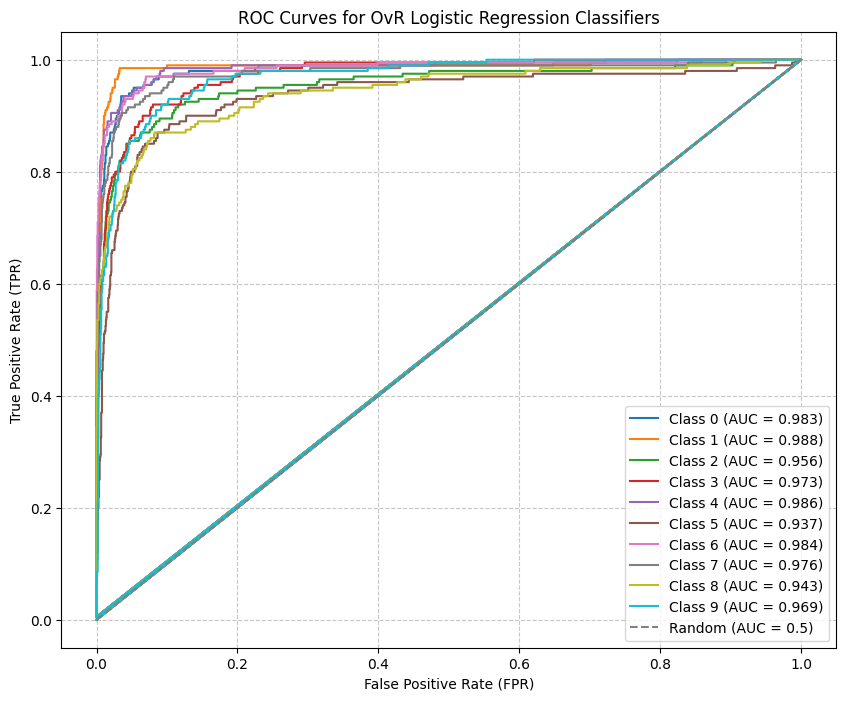


Average AUC across all classes: 0.969

AUC Scores Table:
  Class   AUC
Class 0 0.983
Class 1 0.988
Class 2 0.956
Class 3 0.973
Class 4 0.986
Class 5 0.937
Class 6 0.984
Class 7 0.976
Class 8 0.943
Class 9 0.969
Average 0.969

Comparison with Class-wise Accuracies from Step 6:
  Class Accuracy   AUC
Class 0   94.50% 0.983
Class 1   97.50% 0.988
Class 2   78.50% 0.956
Class 3   83.50% 0.973
Class 4   90.00% 0.986
Class 5   63.00% 0.937
Class 6   91.50% 0.984
Class 7   90.00% 0.976
Class 8   75.00% 0.943
Class 9   79.00% 0.969

Final Deliverable 3 Output - Average AUC: 0.969


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Necessary Data
# Load true labels and probabilities from Step 6 (Task 5 - OvR Logistic Regression)
y_test_np = np.loadtxt("ovr_test_labels.txt", dtype=int)  # Shape: (2000,)
probs_test = np.loadtxt("ovr_test_probabilities.txt")     # Shape: (2000, 10)

# Verify shapes
print(f"True labels shape: {y_test_np.shape}")
print(f"Probabilities shape: {probs_test.shape}")

# Create binary labels for each class (0-9)
binary_labels = {}
for cls in range(10):
    binary_labels[cls] = (y_test_np == cls).astype(int)  # 1 if class cls, 0 otherwise

# Step 2: Compute ROC Curves and AUC Scores for Each Class
def compute_roc_curve(y_true, y_score):
    # Sort scores and corresponding true labels in descending order
    indices = np.argsort(y_score)[::-1]
    y_true = y_true[indices]
    y_score = y_score[indices]
    
    # Initialize
    thresholds = np.unique(y_score)
    false_positive_rate = []
    true_positive_rate = []
    n_pos = np.sum(y_true == 1)  # Number of positive samples
    n_neg = np.sum(y_true == 0)  # Number of negative samples
    
    # Compute FPR and TPR for each threshold
    for thresh in thresholds:
        y_pred = (y_score >= thresh).astype(int)
        true_positive = np.sum((y_pred == 1) & (y_true == 1))
        false_positive = np.sum((y_pred == 1) & (y_true == 0))
        true_positive_rate.append(true_positive / n_pos if n_pos > 0 else 0)
        false_positive_rate.append(false_positive / n_neg if n_neg > 0 else 0)
    
    # Add endpoints
    false_positive_rate = np.array([0] + false_positive_rate + [1])
    true_positive_rate = np.array([0] + true_positive_rate + [1])
    thresholds = np.array([1.0] + list(thresholds) + [0.0])
    
    return false_positive_rate, true_positive_rate, thresholds

def compute_auc(false_positive_rate, true_positive_rate):
    # Sort by FPR to ensure correct trapezoidal integration
    indices = np.argsort(false_positive_rate)
    false_positive_rate = false_positive_rate[indices]
    true_positive_rate = true_positive_rate[indices]
    auc = 0.0
    for i in range(len(false_positive_rate) - 1):
        auc += (false_positive_rate[i+1] - false_positive_rate[i]) * (true_positive_rate[i] + true_positive_rate[i+1]) / 2
    return auc

# Compute ROC curves and AUC scores for each class
roc_curves = {}
auc_scores = {}
for cls in range(10):
    y_true = binary_labels[cls]  # Binary labels for class cls
    y_score = probs_test[:, cls]  # Probability scores for class cls
    false_positive_rate, true_positive_rate, thresholds = compute_roc_curve(y_true, y_score)
    auc = compute_auc(false_positive_rate, true_positive_rate)
    roc_curves[cls] = (false_positive_rate, true_positive_rate)
    auc_scores[cls] = auc
    print(f"Class {cls} - AUC: {auc:.3f}")

# Step 3: Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # 10 distinct colors
for cls in range(10):
    false_positive_rate, true_positive_rate = roc_curves[cls]
    plt.plot(false_positive_rate, true_positive_rate, color=colors[cls], 
             label=f"Class {cls} (AUC = {auc_scores[cls]:.3f})")

# Add diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for OvR Logistic Regression Classifiers")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("roc_curves.png")
plt.show()

# Step 4: Compute the Average AUC
average_auc = np.mean(list(auc_scores.values()))
print(f"\nAverage AUC across all classes: {average_auc:.3f}")

# Step 5: Summarize and Analyze Results
# Create a table of AUC scores using pandas
auc_table = [[f"Class {cls}", f"{auc_scores[cls]:.3f}"] for cls in range(10)]
auc_table.append(["Average", f"{average_auc:.3f}"])
auc_df = pd.DataFrame(auc_table, columns=["Class", "AUC"])
print("\nAUC Scores Table:")
print(auc_df.to_string(index=False))

# Compare with class-wise accuracies from Step 6
class_accuracies = {
    0: 94.50, 1: 97.50, 2: 78.50, 3: 83.50, 4: 90.00,
    5: 63.00, 6: 91.50, 7: 90.00, 8: 75.00, 9: 79.00
}
print("\nComparison with Class-wise Accuracies from Step 6:")
comparison_table = []
for cls in range(10):
    row = [f"Class {cls}", f"{class_accuracies[cls]:.2f}%", f"{auc_scores[cls]:.3f}"]
    comparison_table.append(row)
comparison_df = pd.DataFrame(comparison_table, columns=["Class", "Accuracy", "AUC"])
print(comparison_df.to_string(index=False))

# Step 6: Return the Average AUC
print(f"\nFinal Deliverable 3 Output - Average AUC: {average_auc:.3f}")